# EMG Signal Processing Assignment

## Setup
    Import necessary libraries: numpy, scipy, matplotlib.

## Part 1: Signal Filtering

    Task: Implement a Butterworth filter to remove high-frequency noise from the EMG signal.
    Task: Compare the frequency response of the original and filtered signals using a frequency plot.

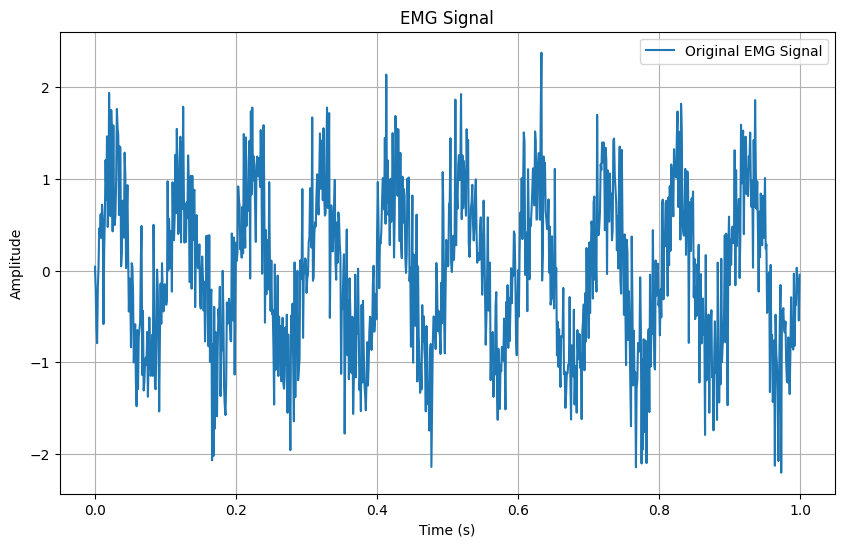

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt

# Generate example EMG signal with noise
fs = 1000  # Sampling frequency (Hz)
t = np.arange(0, 1, 1/fs)  # Time vector (1 second)
emg_signal = np.sin(2*np.pi*10*t) + 0.5*np.random.randn(len(t))

# Plot original and filtered signals
plt.figure(figsize=(10, 6))
plt.plot(t, emg_signal, label='Original EMG Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('EMG Signal')
plt.legend()
plt.grid(True)
plt.show()


In [3]:
#Implement Butterworth filter or any other best suited filter.
def butter_lowpass(emg_signal,fs):
    cutoff=50
    order=2
    nyq=fs*0.5
    norcutoff=cutoff/nyq
    b,a=butter(order,norcutoff,btype='low',analog=False)
    y=filtfilt(b,a,emg_signal)
    return y

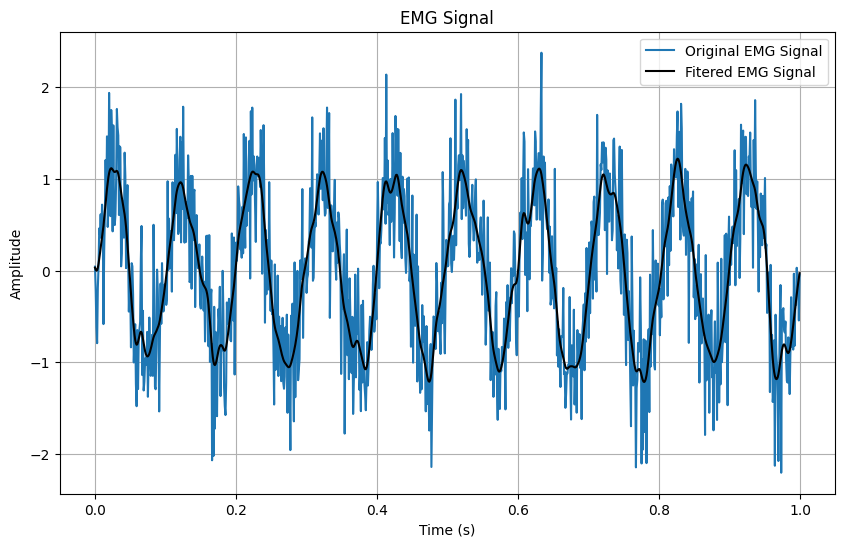

In [13]:
#Compare the frequency response of the original and filtered signals using a frequency plot.
y=butter_lowpass(emg_signal,fs)

plt.figure(figsize=(10, 6))
plt.plot(t, emg_signal, label='Original EMG Signal')
plt.plot(t, y, label='Fitered EMG Signal',color='black')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('EMG Signal')
plt.legend()
plt.grid(True)
plt.show()


## Part 2: Peak Detection

    Task: Utilize scipy.signal.find_peaks to detect peaks in the filtered EMG signal.
    Question: What parameters can be adjusted in find_peaks function to improve peak detection accuracy?
    Task: Plot the original signal with markers indicating the detected peaks.

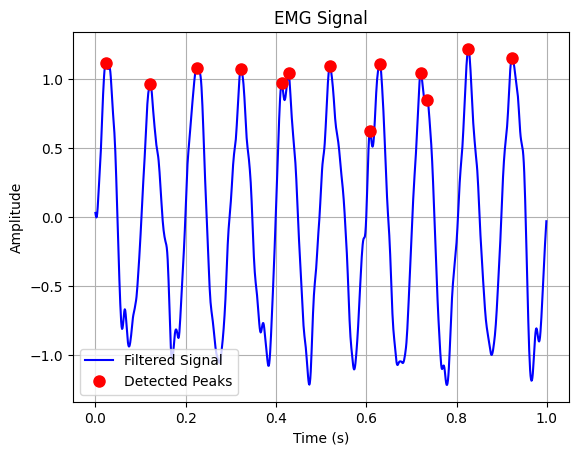

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks


height = 0.5 
distance = 10  
width = (1, None)  
prominence = None 
threshold = None 

peaks, _ = find_peaks(y, height=height, distance=distance, width=width, prominence=prominence, threshold=threshold)

# Plot the original signal with markers indicating the detected peaks
plt.figure()
plt.plot(t, y, 'b-', label='Filtered Signal') 
plt.plot(t[peaks],y[peaks], 'ro', markersize=8, label='Detected Peaks')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('EMG Signal')
plt.legend()
plt.grid()
plt.show()


Answer the Question here:

In [6]:
#height: This parameter sets the minimum height that a peak must have in order to be detected. Adjusting this parameter can help filter out small peaks or noise.

#distance: This parameter sets the minimum horizontal distance (in samples) between adjacent peaks. Increasing this value can ensure that only the highest peaks are detected, which can be useful in eliminating false positives caused by noise.

#width: This parameter sets the width of the peaks to be detected. It can be either a scalar or an array specifying the minimum and maximum width of the peaks. Adjusting this parameter can help filter out peaks that are too narrow or too wide to be of interest.

#prominence: This parameter sets the minimum prominence of the peaks. Peak prominence is a measure of how much a peak stands out from the surrounding baseline. Adjusting this parameter can help filter out peaks that are not sufficiently distinct.

#threshold: This parameter sets the minimum value of prominence required for a peak to be detected. It can be used in conjunction with or instead of the prominence parameter to further refine peak detection.

## Part 3: Peak Start and End Time Detection

    Task: Develop a method to determine the start and end times of each detected peak.
    Question: Why is it necessary to identify the precise onset and offset times of muscle activation in EMG signals?
    Task: Visualize the original signal with annotated start and end times of peaks.

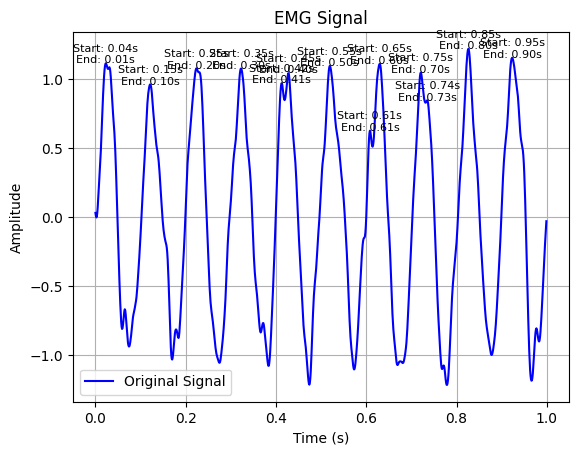

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks, peak_widths

# Assuming 'filtered_data' contains the filtered EMG signal
# Adjust these parameters according to your data and requirements
height = 0.5  # Adjust this value to filter out small peaks or noise
distance = 10  # Adjust this value to ensure only the highest peaks are detected
width = (1, None)  # Adjust this value to filter out peaks that are too narrow or too wide

# Find peaks in the filtered EMG signal
peaks, _ = find_peaks(y, height=height, distance=distance, width=width)

# Calculate the start and end times of each peak
width_results = peak_widths(y, peaks, rel_height=0.5)  # rel_height can be adjusted for better accuracy
start_times = width_results[3] / fs
end_times = width_results[2] / fs

# Plot the original signal with annotated start and end times of peaks
plt.figure()
plt.plot(t, y, 'b-', label='Original Signal')
# plt.plot(t[peaks], y[peaks], 'ro', markersize=8, label='Detected Peaks')

# Annotate start and end times of each peak
for i in range(len(peaks)):
    plt.text(t[peaks[i]], y[peaks[i]], f"Start: {start_times[i]:.2f}s\nEnd: {end_times[i]:.2f}s", fontsize=8, ha='center')

plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('EMG Signal')
plt.legend()
plt.grid()
plt.show()


Answer the Question here:

In [8]:
#Understanding Muscle Activation Patterns: Precise onset and offset times provide insights into the timing and duration of muscle activation. This information helps in understanding muscle recruitment patterns during different activities or movements.

#Assessment of Muscle Function: Analyzing the onset and offset times allows for quantitative assessment of muscle function, such as measuring reaction times or muscle contraction duration. This is crucial in various fields including sports science, rehabilitation, and ergonomics.

#Diagnostic Purposes: In clinical settings, precise detection of muscle activation patterns can aid in diagnosing neuromuscular disorders or abnormalities. Changes in onset or offset times can indicate pathological conditions affecting muscle function.

#Optimization of Treatment and Training: For rehabilitation or sports training purposes, knowing the exact timing of muscle activation helps in designing targeted interventions or exercise regimens tailored to improve specific muscle activation patterns

## Part 4: Envelope Extraction

    Task: Implement the Hilbert transform to extract the envelope of the filtered EMG signal.
    Question: What information does the envelope of an EMG signal provide about muscle activity?
    Task: Plot the original signal overlaid with its envelope.

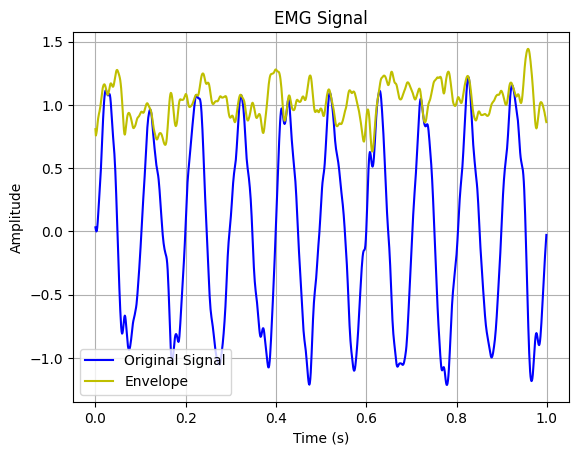

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import hilbert

# Assuming 'filtered_data' contains the filtered EMG signal

# Apply Hilbert transform to the filtered EMG signal
analytic_signal = hilbert(y)
amplitude_envelope = np.abs(analytic_signal)

# Plot the original signal overlaid with its envelope
plt.figure()
plt.plot(t, y, 'b-', label='Original Signal')
plt.plot(t, amplitude_envelope, 'y-', label='Envelope')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('EMG Signal')
plt.legend()
plt.grid()
plt.show()

Answer the Question here:

In [10]:
#Magnitude of Muscle Activation: The envelope of an EMG signal represents the magnitude of muscle activation over time. It provides information about the overall intensity or strength of muscle contractions during different activities.

#Temporal Characteristics: Changes in the envelope reflect the temporal characteristics of muscle activation, including onset, duration, and termination of muscle contractions. Analyzing the envelope can reveal patterns of muscle recruitment and coordination during movements.

#Fatigue and Recovery: Monitoring the envelope can help in assessing muscle fatigue and recovery. Changes in the envelope shape or magnitude over time may indicate fatigue-related alterations in muscle performance.

## Part 5: Time Domain Analysis

    Task: Calculate key metrics such as mean, variance, and RMS (Root Mean Square) of the cleaned EMG signal.
    Task: Interpret the calculated metrics in the context of muscle activity and signal characteristics.

In [11]:
# Calculate keyimport numpy as np

# Assuming 'cleaned_data' contains the cleaned EMG signal

# Calculate mean, variance, and RMS of the cleaned EMG signal
mean = np.mean(y)
variance = np.var(y)
rms = np.sqrt(np.mean(y**2))

# Print the calculated metrics
print("Mean:", mean)
print("Variance:", variance)
print("RMS (Root Mean Square):", rms)



Mean: -0.011158234520932996
Variance: 0.5383947385568923
RMS (Root Mean Square): 0.7338387048626669


Interpretation:
- Mean: A higher mean value may suggest increased muscle activation, while a lower mean value may indicate reduced muscle activity.
- Variance: Higher variance may indicate greater variability in muscle activation, possibly due to changes in force production or signal noise.
- RMS: A higher RMS value corresponds to stronger muscle contractions, while a lower RMS value suggests weaker muscle activity.
These interpretations can provide insights into muscle performance, fatigue, and overall neuromuscular function.

## Part 6: Frequency Domain Analysis

    Task: Apply the Fast Fourier Transform (FFT) to analyze the frequency components of the cleaned EMG signal.
    Task: Plot the frequency spectrum of the EMG signal and identify prominent frequency peaks.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


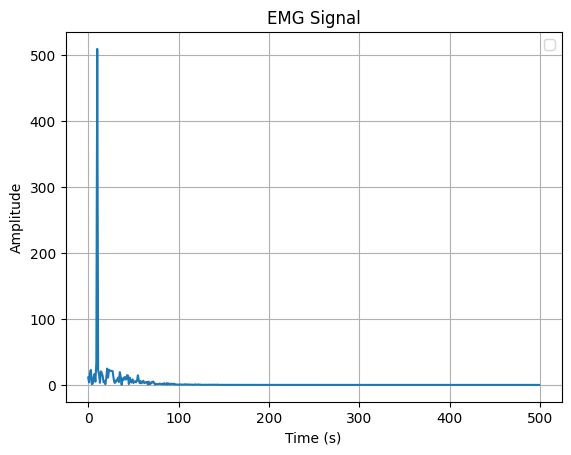

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming 'cleaned_data' contains the cleaned EMG signal

# Perform Fast Fourier Transform (FFT) on the cleaned EMG signal
fft_result = np.fft.fft(y)
fft_freq = np.fft.fftfreq(len(y), 1/fs)  # Frequency axis

# Plot the frequency spectrum of the EMG signal
plt.figure()
plt.plot(fft_freq[:len(fft_freq)//2], np.abs(fft_result)[:len(fft_freq)//2])  # Plot positive frequencies only
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('EMG Signal')
plt.legend()
plt.grid()
plt.show()